In [28]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib.pyplot as plt
np.random.seed(12345)

%matplotlib inline

def plot_acf_pcf(arr):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    # Plot autocorrelation 
    fig = sm.graphics.tsa.plot_acf(arr, lags=40, ax=ax1)
    # Plot Partial Auto Correlation 
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(arr, lags=40, ax=ax2)

<i>Generate some data for ARMA process

In [29]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])


<i>The conventions of the arma_generate function require that we specify a 1 for the zero-lag of the AR and MA parameters and that the AR parameters be negated.

In [30]:
arparams = np.r_[1, -arparams] 
maparam = np.r_[1, maparams]
nobs = 250
y = arma_generate_sample(arparams, maparams, nobs)

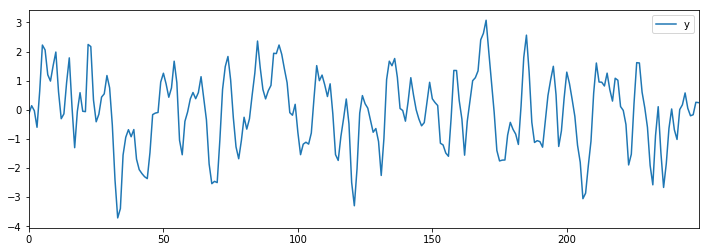

In [31]:
%matplotlib inline
df = pd.DataFrame({'y':y})
df.plot(figsize=(12,4))

'\nACF and PCF both tailoff..\n'

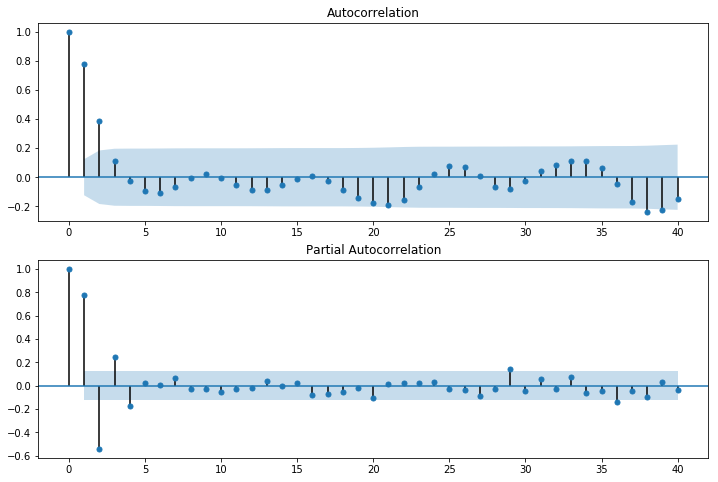

In [32]:
plot_acf_pcf(y)
"""
ACF and PCF both tailoff..
"""

In [33]:
# TRY TO FIT A MODEL

arma_mod = sm.tsa.ARMA(y, order=(2,2))
arma_res = arma_mod.fit(trend='nc', disp=-1)

In [34]:
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  250
Model:                     ARMA(2, 2)   Log Likelihood                -245.887
Method:                       css-mle   S.D. of innovations              0.645
Date:                Fri, 31 Mar 2017   AIC                            501.773
Time:                        16:57:59   BIC                            519.381
Sample:                             0   HQIC                           508.860
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.8411      0.403      2.089      0.038       0.052       1.630
ar.L2.y       -0.2693      0.247     -1.092      0.276      -0.753       0.214
ma.L1.y        0.5352      0.412      1.299      0.1

In [35]:
print(arma_res.pvalues)

[ 0.03778034  0.2759895   0.19530068  0.95925458]


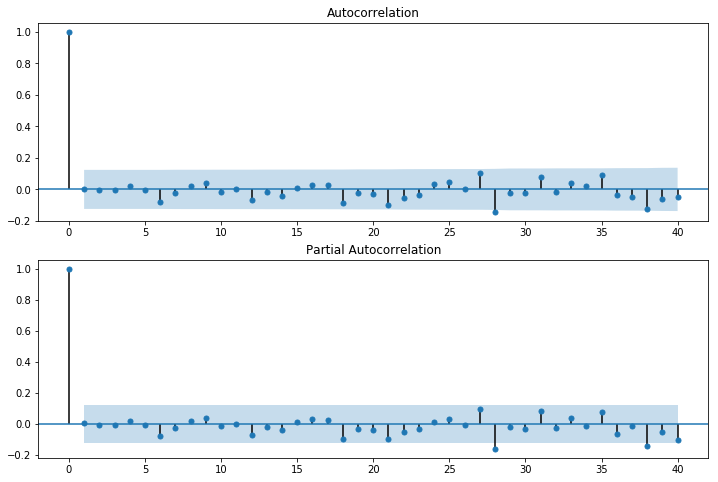

In [36]:
plot_acf_pcf(arma_res.resid)

In [37]:
resid = arma_res.resid
r,q,p = sm.tsa.acf(resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.004016   0.004081  0.949065
2.0  -0.005275   0.011149  0.994441
3.0  -0.004161   0.015565  0.999486
4.0   0.019250   0.110465  0.998530
5.0  -0.004386   0.115412  0.999769
6.0  -0.078939   1.724319  0.943228
7.0  -0.023424   1.866571  0.966855
8.0   0.021669   1.988813  0.981353
9.0   0.039593   2.398595  0.983487
10.0 -0.016681   2.471638  0.991283
11.0  0.002070   2.472768  0.996024
12.0 -0.065284   3.600943  0.989610
13.0 -0.015059   3.661225  0.994290
14.0 -0.041248   4.115413  0.994731
15.0  0.006663   4.127315  0.997290
16.0  0.029394   4.359937  0.998130
17.0  0.027140   4.559104  0.998768
18.0 -0.084887   6.515854  0.993613
19.0 -0.024834   6.684049  0.995717
20.0 -0.027922   6.897598  0.997008
21.0 -0.098342   9.558201  0.984098
22.0 -0.056668  10.445532  0.981796
23.0 -0.036678  10.818883  0.984961
24.0  0.033960  11.140380  0.987975
25.0  0.045253  11.713770  0.988725
26.0  0.001801  11.714682  0

In [38]:
"""
 We will use the Durbin-Watson test for autocorrelation. 
 The Durbin-Watson statistic ranges in value from 0 to 4.
 A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; 
 a value toward 4 indicates negative autocorrelation.
"""
sm.stats.durbin_watson(arma_res.resid)

1.9900728899812516

<i>Looks like white noise..

P-Q Values are well above 0.05 confidence interval